## Churn Prediction using Logisitic Regression and XGboost



In this project, we aim to build predictive models to identify customers who are likely to churn — that is, customers whose average balance may fall below the minimum threshold in the upcoming quarter.

we shall use two different machine learning algorithms: **Logistic Regression** and **XGBoost**. Both models will be trained on the same dataset to ensure a fair comparison of their predictive capabilities.

###  Model Overview

- **Logistic Regression** will serve as a baseline model.  
  It is a simple yet powerful algorithm for binary classification problems and provides interpretable coefficients that indicate the impact of each feature on the probability of churn.

- **XGBoost (Extreme Gradient Boosting)** is a more advanced, tree-based ensemble method known for its high accuracy and robustness.  
  It builds multiple weak learners (decision trees) sequentially and optimizes them using gradient boosting to minimize classification errors.

###  Model Objective

The main goal is to:
- Predict whether a customer will churn (`1`) or not (`0`).
- Compare the performance of **Logistic Regression** and **XGBoost** models.
- Evaluate both models using metrics such as  **Precision**, **Recall**, **F1-Score**, and **ROC–AUC**.

At the end of the analysis, the better-performing model will be identified and its key predictive features will be interpreted to gain insights into the major drivers of customer churn.


## Data Dictionary

There are multiple variables in the dataset which can be cleanly divided in 3 categories:

#### Demographic information about customers

<b>customer_id</b> - Customer id

<b>vintage</b> - Vintage of the customer with the bank in number of days

<b>age</b> - Age of customer

<b>gender</b> - Gender of customer

<b>dependents</b> - Number of dependents

<b>occupation</b> - Occupation of the customer 

<b>city</b> - City of customer (anonymised)


#### Customer Bank Relationship


<b>customer_nw_category</b> - Net worth of customer (3:Low 2:Medium 1:High)

<b>branch_code</b> - Branch Code for customer account

<b>days_since_last_transaction</b> - No of Days Since Last Credit in Last 1 year


#### Transactional Information

<b>current_balance</b> - Balance as of today

<b>previous_month_end_balance</b> - End of Month Balance of previous month


<b>average_monthly_balance_prevQ</b> - Average monthly balances (AMB) in Previous Quarter

<b>average_monthly_balance_prevQ2</b> - Average monthly balances (AMB) in previous to previous quarter

<b>current_month_credit</b> - Total Credit Amount current month

<b>previous_month_credit</b> - Total Credit Amount previous month

<b>current_month_debit</b> - Total Debit Amount current month

<b>previous_month_debit</b> - Total Debit Amount previous month

<b>current_month_balance</b> - Average Balance of current month

<b>previous_month_balance</b> - Average Balance of previous month

<b>churn</b> - Average balance of customer falls below minimum balance in the next quarter (1/0)

##  Churn Prediction using Logistic Regression

Now that we have a thorough understanding of the dataset, the next step is to build a **Logistic Regression model** to predict customer churn.  
For convenience, the data dictionary is included again as a reference point during the modeling process.

####  Modeling Workflow

The process will involve the following steps:

- **Load the data and required libraries** for model building and preprocessing.  
- **Handle missing values** and perform the necessary data cleaning steps.  
- **Select relevant features** based on insights from the Exploratory Data Analysis (EDA) and create a baseline model.  
- **Define evaluation metrics** aligned with the business objective to assess model performance.  
- **Train a full-feature model** using all available predictors and compare its results with the baseline.  
- **Apply Recursive Feature Elimination (RFE)** to identify the most important predictors, rebuild the model using the top 10 features, and compare the results.

This step-by-step approach ensures that the final model is both interpretable and effective in predicting customer churn.


### Loading Packages

In [96]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, roc_curve, precision_score, recall_score, precision_recall_curve
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
%matplotlib inline

### Loading Data

In [97]:
df = pd.read_csv('churn_prediction.csv')
df.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,Male,0.0,self_employed,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,2,310,35,Male,0.0,self_employed,NaN,2,3214,60.0,...,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
2,4,2356,31,Male,0.0,salaried,146.0,2,41,NaN,...,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
3,5,478,90,NaN,NaN,self_employed,1020.0,2,582,147.0,...,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,6,2531,42,Male,2.0,self_employed,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1


##  Exploratory Data Analysis (EDA)

Before building any models, it is important to understand the dataset:  
- Identify **missing values**  
- Examine **distributions of numerical and categorical features**  
- Look for **relationships with the target variable (`churn`)**  
- Identify potential **outliers or skewed distributions**  


In [98]:
# Check for missing values in each column
missing_values = df.isnull().sum()
missing_values[missing_values > 0]  # Display only columns with missing values


gender                          525
dependents                     2463
occupation                       80
city                            803
days_since_last_transaction    3223
dtype: int64

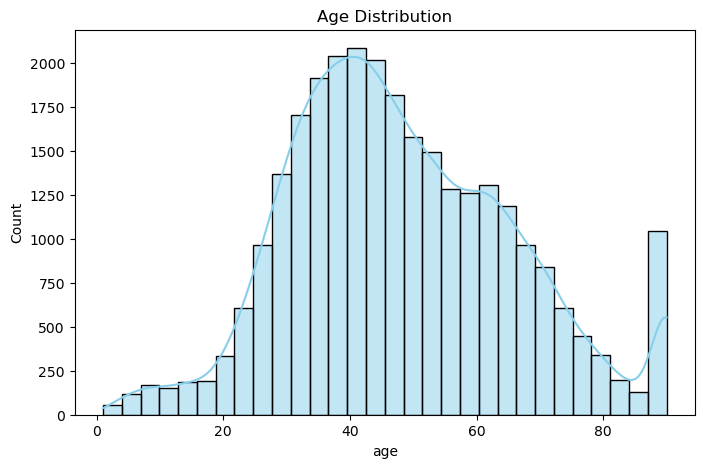

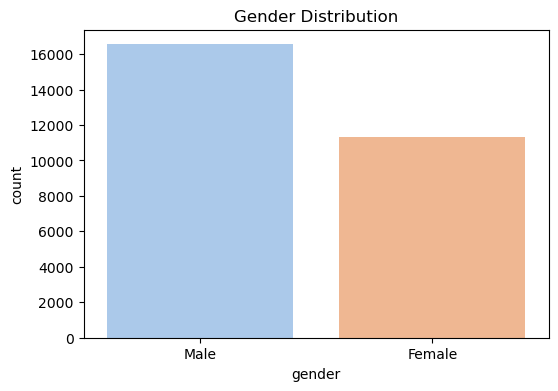

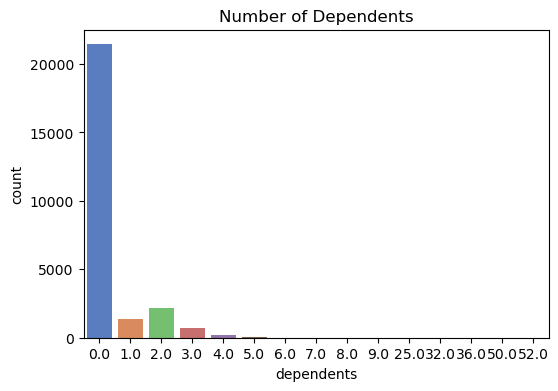

In [99]:

# Age distribution
plt.figure(figsize=(8,5))
sns.histplot(df['age'], bins=30, kde=True, color='skyblue')
plt.title('Age Distribution')
plt.show()

# Gender distribution
plt.figure(figsize=(6,4))
sns.countplot(x='gender', data=df, palette='pastel')
plt.title('Gender Distribution')
plt.show()

# Dependents distribution
plt.figure(figsize=(6,4))
sns.countplot(x='dependents', data=df, palette='muted')
plt.title('Number of Dependents')
plt.show()


Identified target column: churn

Class distribution:


churn
0    23122
1     5260
Name: count, dtype: int64

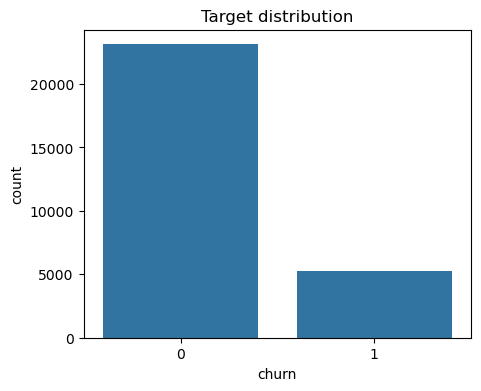

In [100]:

# Identify potential target column automatically (common names) or use last column
target_candidates = [c for c in df.columns if 'churn' in c.lower() or c.lower() in ['target','is_churn','label','churned']]
target_col = target_candidates[0] if target_candidates else df.columns[-1]
print(f'Identified target column: {target_col}')

# Show class balance
print('\nClass distribution:')
display(df[target_col].value_counts())
plt.figure(figsize=(5,4))
sns.countplot(x=df[target_col])
plt.title('Target distribution')
plt.show()

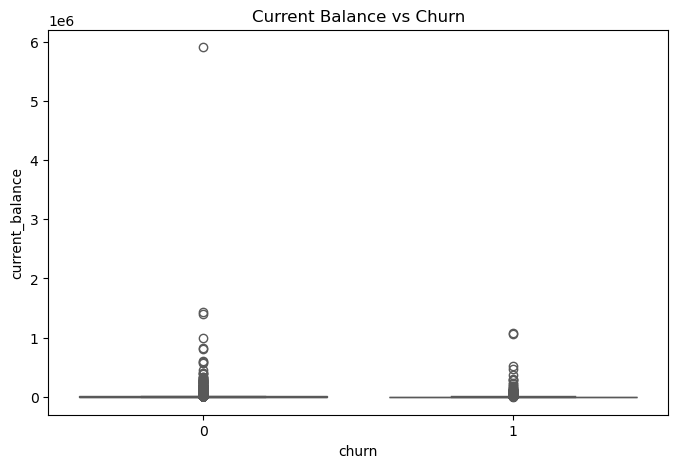

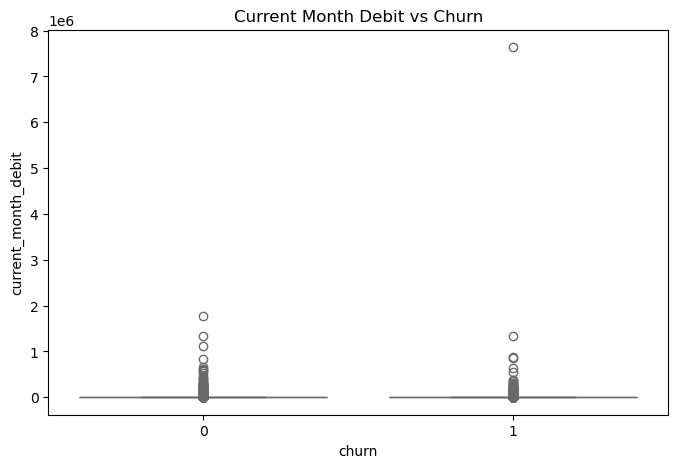

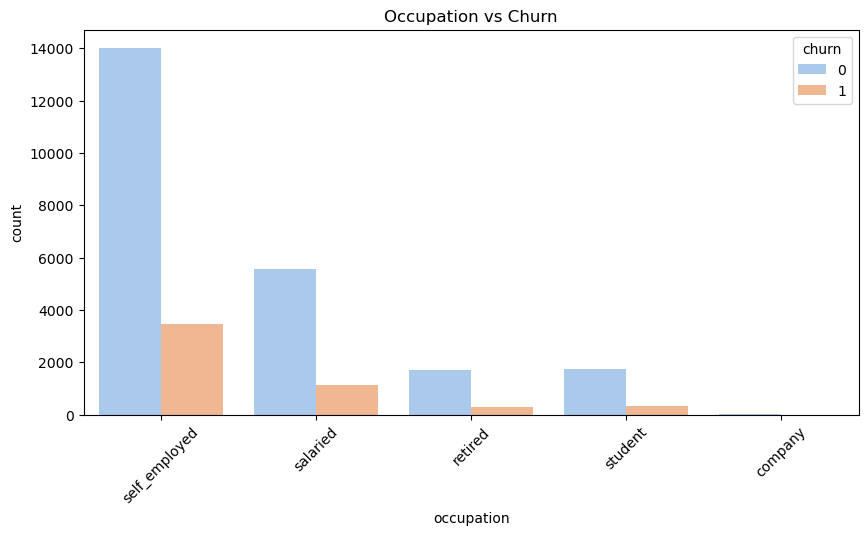

In [101]:
# Average balance by churn
plt.figure(figsize=(8,5))
sns.boxplot(x='churn', y='current_balance', data=df, palette='Set2')
plt.title('Current Balance vs Churn')
plt.show()

# Current month debit vs churn
plt.figure(figsize=(8,5))
sns.boxplot(x='churn', y='current_month_debit', data=df, palette='Set3')
plt.title('Current Month Debit vs Churn')
plt.show()

# Occupation vs churn
plt.figure(figsize=(10,5))
sns.countplot(x='occupation', hue='churn', data=df, palette='pastel')
plt.title('Occupation vs Churn')
plt.xticks(rotation=45)
plt.show()


In [102]:


# Select only numerical features for pairplot
num_features = ['vintage', 'age', 'current_balance', 'previous_month_end_balance',
                'average_monthly_balance_prevQ', 'average_monthly_balance_prevQ2',
                'current_month_credit', 'previous_month_credit',
                'current_month_debit', 'previous_month_debit',
                'current_month_balance', 'previous_month_balance']

# Add the target variable 'churn' for coloring
#pairplot_df = df[num_features + ['churn']]

# Plot pairplot
#sns.pairplot(pairplot_df, hue='churn', diag_kind='kde', palette='Set1', plot_kws={'alpha':0.5})
#plt.suptitle('Pairplot of Numerical Features vs Churn', y=1.02)
#plt.show()


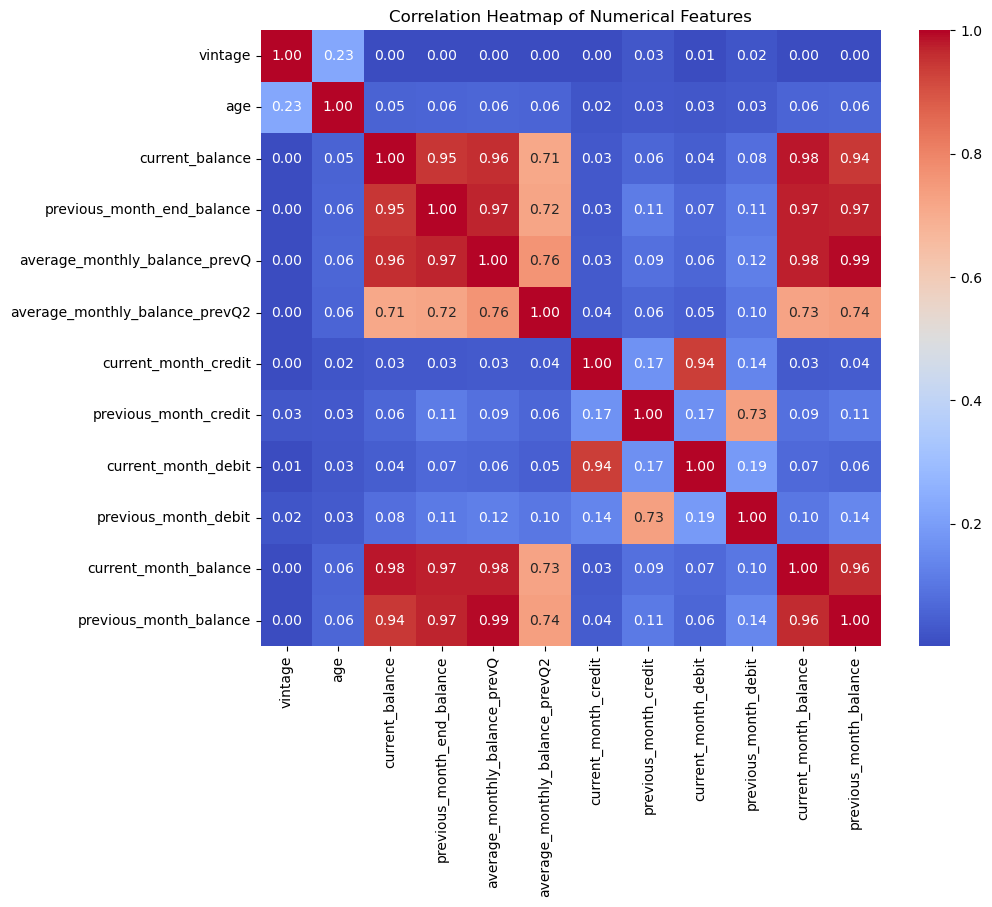

In [103]:
plt.figure(figsize=(10,8))
sns.heatmap(df[num_features].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


 ### Data cleaning & preprocessing

###  Handling Missing Values

Before proceeding to model building, it is essential to examine the dataset for any **missing values**.  
Addressing missing data is a critical preprocessing step, as it ensures that the **Logistic Regression model** (and any subsequent models) is trained on complete and reliable information.  
Proper treatment of missing values helps improve both the accuracy and stability of the model’s predictions.


In [104]:
pd.isnull(df).sum()#we check for missing values in the dataset

customer_id                          0
vintage                              0
age                                  0
gender                             525
dependents                        2463
occupation                          80
city                               803
customer_nw_category                 0
branch_code                          0
days_since_last_transaction       3223
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
dtype: int64

In [105]:
# Display only columns that have missing values (if any)
df.isnull().sum()[df.isnull().sum() > 0]


gender                          525
dependents                     2463
occupation                       80
city                            803
days_since_last_transaction    3223
dtype: int64

#### Missing Value Analysis

The output from the missing value check shows that several columns contain null values — specifically **gender**, **dependents**, **city**, **days_since_last_transaction**, and **percentage_change_in_credits**.  

Each of these variables needs to be examined individually to determine the most suitable **imputation strategy**.  
In the next steps, we’ll go through each of these columns one by one and decide how to handle the missing values based on the nature of the data and its importance in the model.


####  Gender

To begin handling missing values, let's first review the **categories present** in the `gender` column.  
This will help us decide the appropriate strategy for imputing any missing entries.


In [106]:
# Display the unique categories and their counts in the 'gender' column
# This helps us understand the distribution of genders in the dataset
# and informs how we might handle missing values.
df['gender'].value_counts()
# Include missing values in the count
df['gender'].value_counts(dropna=False)


gender
Male      16548
Female    11309
NaN         525
Name: count, dtype: int64



The `gender` column has a fairly balanced distribution of males and females, so filling missing values with one category could introduce bias.  
A practical approach is to create a separate category for missing values by assigning `-1`.  

Before doing that, we will convert the gender categories into **binary values** (0/1) and then replace the missing entries with `-1`.


In [107]:
#  Convert gender categories into numeric values
# Mapping: Male -> 1, Female -> 0
dict_gender = {'Male': 1, 'Female': 0}
df.replace({'gender': dict_gender}, inplace=True)

#  Handle missing values
# Replace any missing values in 'gender' with -1 to indicate 'Unknown'
df['gender'] = df['gender'].fillna(-1)

#  Check the updated gender column
df['gender'].value_counts(dropna=False)


gender
 1.0    16548
 0.0    11309
-1.0      525
Name: count, dtype: int64

####  Dependents, Occupation, and City

Next, we will examine the `dependents`, `occupation`, and `city` columns.  
Since these are categorical (and `dependents` can be considered ordinal), a reasonable approach is to **impute missing values with the mode** (the most frequent category) for each column.  
This helps preserve the most common values without introducing bias.


In [108]:
#Check the distribution of 'dependents' and 'occupation' before imputation
df['dependents'].value_counts()


dependents
0.0     21435
2.0      2150
1.0      1395
3.0       701
4.0       179
5.0        41
6.0         8
7.0         3
9.0         1
52.0        1
36.0        1
50.0        1
8.0         1
25.0        1
32.0        1
Name: count, dtype: int64

In [109]:
df['occupation'].value_counts()

occupation
self_employed    17476
salaried          6704
student           2058
retired           2024
company             40
Name: count, dtype: int64

In [110]:

#  Handle missing values
# For 'dependents', missing values are replaced with 0 (assumes no dependents)
df['dependents'] = df['dependents'].fillna(0)

# For 'occupation', missing values are replaced with 'self_employed' (mode of the column)
df['occupation'] = df['occupation'].fillna('self_employed')

#  Verify that missing values have been handled
df[['dependents', 'occupation']].isnull().sum()


dependents    0
occupation    0
dtype: int64



The `city` column contains missing values as well.  
A simple and effective approach is to **impute missing entries with the most common category**, which ensures that no data is lost and the column remains usable for modeling.


In [111]:
# Impute missing values in 'city' with the mode (most frequent city)
most_common_city = df['city'].mode()[0]
df['city'] = df['city'].fillna(most_common_city)

#  Verify that there are no missing values left in 'city'
df['city'].isnull().sum()


np.int64(0)

#### Days since Last Transaction
A fair assumption can be made on this column as this is number of days since last transaction in 1 year, we can substitute missing values with a value greater than 1 year say 999

In [112]:
# Impute missing values in 'days_since_last_transaction' with 999
df['days_since_last_transaction'] = df['days_since_last_transaction'].fillna(999)

#  Verify that missing values have been handled
df['days_since_last_transaction'].isnull().sum()


np.int64(0)

###  Preprocessing

Before applying a **linear model** like Logistic Regression, we need to prepare the data properly.  

Key preprocessing steps include:

- **Ensure all features are numeric:** Linear models require numeric inputs, so categorical columns must be encoded or converted.  
- **Feature scaling:** Logistic Regression is sensitive to feature scales, so we should scale numeric features (e.g., using StandardScaler or MinMaxScaler) to bring them onto a comparable range.  
- **Final checks:** Ensure there are no missing values and that the dataset is ready for model training.


### Dummies with Multiple Categories
#### One-Hot Encoding for Multi-Category Variables

The `occupation` column has multiple categories, so we need to convert it into **numeric features** before applying linear models like Logistic Regression.  
One-hot encoding is a common approach that creates a **separate binary column for each category**, allowing the model to interpret them correctly.


In [113]:
# One-hot encode 'occupation' and ensure the new columns are integers (0/1)
occupation_dummies = pd.get_dummies(df['occupation'], prefix='occupation', prefix_sep='_').astype(int)

# Concatenate the new dummy columns to the dataframe
df = pd.concat([df, occupation_dummies], axis=1)

#  Check first few rows
df.head()


,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,occupation_company,occupation_retired,occupation_salaried,occupation_self_employed,occupation_student
0,1,3135,66,1.0,0.0,self_employed,187.0,2,755,224.0,...,0.20,0.20,1458.71,1458.71,0,0,0,0,1,0
1,2,310,35,1.0,0.0,self_employed,1020.0,2,3214,60.0,...,5486.27,100.56,6496.78,8787.61,0,0,0,0,1,0
2,4,2356,31,1.0,0.0,salaried,146.0,2,41,999.0,...,6046.73,259.23,5006.28,5070.14,0,0,0,1,0,0
3,5,478,90,-1.0,0.0,self_employed,1020.0,2,582,147.0,...,0.47,2143.33,2291.91,1669.79,1,0,0,0,1,0
4,6,2531,42,1.0,2.0,self_employed,1494.0,3,388,58.0,...,588.62,1538.06,1157.15,1677.16,1,0,0,0,1,0


 Scaling Numerical Features for Logistic Regression

From our EDA, we observed that several numeric features, especially **current and previous balance columns**, contain **outliers** and have **skewed distributions**.  

To address this and prepare the data for a linear model like Logistic Regression, we will apply **two preprocessing steps**:

1. **Log Transformation** – to reduce skewness and make the distribution more normal.  
2. **Standard Scaling** – to standardize the features, bringing them onto a similar scale, which is essential for linear models to perform correctly.

By combining these steps, we ensure that the model is not unduly influenced by extreme values and that all numeric features are comparable.


In [114]:
from sklearn.preprocessing import StandardScaler
import numpy as np

#  List of numeric columns to log-transform and scale
num_cols = ['customer_nw_category', 'current_balance',
            'previous_month_end_balance', 'average_monthly_balance_prevQ2', 'average_monthly_balance_prevQ',
            'current_month_credit','previous_month_credit', 'current_month_debit', 
            'previous_month_debit','current_month_balance', 'previous_month_balance']

#  Apply log transformation to reduce skewness
# Adding 17000 to avoid negative or zero values before taking log
for i in num_cols:
    df[i] = np.log(df[i] + 17000)

#  Standard scaling
# Linear models require scaled features for better convergence and stability
std = StandardScaler()
scaled = std.fit_transform(df[num_cols])

# Convert the scaled array back to a DataFrame for easier handling
scaled = pd.DataFrame(scaled, columns=num_cols)

#  Check first few rows of scaled features
scaled.head()


,customer_nw_category,current_balance,previous_month_end_balance,average_monthly_balance_prevQ2,average_monthly_balance_prevQ,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance
0,-0.341470,-0.613738,-0.632367,-0.630646,-0.697612,-0.313931,-0.324487,-0.368251,-0.377390,-0.653455,-0.666207
1,-0.341470,0.011267,0.446458,0.949414,0.317595,-0.313852,-0.324410,0.640986,-0.355677,0.149440,0.455680
2,-0.341470,-0.209651,0.057975,-0.388637,-0.108263,-0.313841,-0.324400,0.729825,-0.321607,-0.068597,-0.066642
3,-0.341470,-0.470836,-0.488530,-0.712855,-0.582976,-0.313872,-0.324429,-0.368193,0.060593,-0.506570,-0.628056
4,1.172658,-0.708214,-0.642441,-0.554058,-0.663399,-0.313902,-0.175104,-0.245463,-0.057927,-0.708257,-0.626732


In [115]:
#  Keep a copy of the original dataframe for reference or backup
df_df_og = df.copy()

#  Drop the original numeric columns from the dataframe
# We'll replace them with the log-transformed and scaled versions
df = df.drop(columns=num_cols, axis=1)

#  Merge the scaled numeric features back into the dataframe
# left_index and right_index ensure the rows align correctly
df = df.merge(scaled, left_index=True, right_index=True, how="left")

#  Check the first few rows to confirm the merge
df.head()


,customer_id,vintage,age,gender,dependents,occupation,city,branch_code,days_since_last_transaction,churn,...,current_balance,previous_month_end_balance,average_monthly_balance_prevQ2,average_monthly_balance_prevQ,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance
0,1,3135,66,1.0,0.0,self_employed,187.0,755,224.0,0,...,-0.613738,-0.632367,-0.630646,-0.697612,-0.313931,-0.324487,-0.368251,-0.377390,-0.653455,-0.666207
1,2,310,35,1.0,0.0,self_employed,1020.0,3214,60.0,0,...,0.011267,0.446458,0.949414,0.317595,-0.313852,-0.324410,0.640986,-0.355677,0.149440,0.455680
2,4,2356,31,1.0,0.0,salaried,146.0,41,999.0,0,...,-0.209651,0.057975,-0.388637,-0.108263,-0.313841,-0.324400,0.729825,-0.321607,-0.068597,-0.066642
3,5,478,90,-1.0,0.0,self_employed,1020.0,582,147.0,1,...,-0.470836,-0.488530,-0.712855,-0.582976,-0.313872,-0.324429,-0.368193,0.060593,-0.506570,-0.628056
4,6,2531,42,1.0,2.0,self_employed,1494.0,388,58.0,1,...,-0.708214,-0.642441,-0.554058,-0.663399,-0.313902,-0.175104,-0.245463,-0.057927,-0.708257,-0.626732


In [116]:
#  Separate the target variable 'churn' from the features
y_all = df['churn']

#  Drop columns that won't be used as features:
# - 'churn' is the target, so we remove it from X
# - 'customer_id' is just an identifier
# - 'occupation' has already been one-hot encoded
df = df.drop(['churn', 'customer_id', 'occupation'], axis=1)

#  Check the first few rows of the feature dataframe
#df.head()


##  Model Building and Evaluation Metrics

Since this is a **binary classification problem**, we will focus on the following two popular evaluation metrics:

1. **Recall**  
2. **Area under the Receiver Operating Characteristic curve (ROC AUC)**

We emphasize **recall** because **failing to identify a churning customer** is more critical than incorrectly predicting churn for a non-churning customer.  
If a true churning customer is not detected, the bank might miss the opportunity to take preventive measures.

The **ROC AUC** represents the area under the curve obtained by plotting the **true positive rate** (y-axis) against the **false positive rate** (x-axis).  

In our analysis:  
- **Recall** will be the **primary metric** to evaluate model performance.  
- **ROC AUC** will help assess how well the predicted probabilities distinguish between the two classes.


### Conclusions from EDA

- **Debit values:** There is a significant difference in the distribution between churn and non-churn customers, suggesting this could be an important predictive feature.  
- **Balance features:** Lower balance values are associated with a higher proportion of churning customers.  
- **Vintage values:** For the most frequent vintage ranges, churn is slightly higher, while higher vintage values correspond mostly to non-churning customers. This aligns with trends observed in the age variable.  
- **Occupation:** There are notable differences across occupations, making this an interesting feature for predicting churn.

Based on these observations, we will now **split the dataset into training and test sets**.  
Using the insights from EDA, we will **select relevant columns** and build a **baseline Logistic Regression model** to evaluate performance using the **ROC-AUC Score** and **confusion matrix**.


### Baseline Columns

Based on the conclusions from EDA, we select a set of **baseline features** to build the initial Logistic Regression model.  
These include key **balance and debit features**, **vintage**, and selected **occupation categories** that showed significant differences between churn and non-churn customers.


In [117]:
# List of columns selected as baseline features for the first Logistic Regression model
baseline_cols = [
    'current_month_debit', 
    'previous_month_debit',
    'current_balance',
    'previous_month_end_balance',
    'vintage',
    'occupation_retired', 
    'occupation_salaried',
    'occupation_self_employed', 
    'occupation_student'
]

#  Verify the selected baseline columns
baseline_cols


['current_month_debit',
 'previous_month_debit',
 'current_balance',
 'previous_month_end_balance',
 'vintage',
 'occupation_retired',
 'occupation_salaried',
 'occupation_self_employed',
 'occupation_student']

In [118]:
#  Create a new dataframe containing only the baseline features selected for the initial model
df_baseline = df[baseline_cols]

#  Check the first few rows to confirm
df_baseline.head()


,current_month_debit,previous_month_debit,current_balance,previous_month_end_balance,vintage,occupation_retired,occupation_salaried,occupation_self_employed,occupation_student
0,-0.368251,-0.377390,-0.613738,-0.632367,3135,0,0,1,0
1,0.640986,-0.355677,0.011267,0.446458,310,0,0,1,0
2,0.729825,-0.321607,-0.209651,0.057975,2356,0,1,0,0
3,-0.368193,0.060593,-0.470836,-0.488530,478,0,0,1,0
4,-0.245463,-0.057927,-0.708214,-0.642441,2531,0,0,1,0


### Train Test Split to create a validation set

In [119]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

#  Split the dataset into training and validation (test) sets
# - xtrain, ytrain: training features and labels
# - xtest, ytest: validation features and labels
# - test_size=1/3: 33% of the data is reserved for validation
# - random_state=11: ensures reproducibility
# - stratify=y_all: preserves the proportion of churn/non-churn in both sets



#  Split dataset into training and validation sets
xtrain, xtest, ytrain, ytest = train_test_split(
    df_baseline, y_all, test_size=1/3, random_state=11, stratify=y_all
)

print("Training set shape:", xtrain.shape, ytrain.shape)
print("Validation set shape:", xtest.shape, ytest.shape)

#  Apply SMOTE only on the training set since EDA showed class imbalance
# - SMOTE generates synthetic samples for the minority class to balance the dataset
# - random_state=42: ensures reproducibility of the synthetic samples
smote = SMOTE(random_state=42)
xtrain_res, ytrain_res = smote.fit_resample(xtrain, ytrain)

print("Resampled training set shape:", xtrain_res.shape, ytrain_res.shape)
print("Class distribution after SMOTE:\n", ytrain_res.value_counts())


Training set shape: (18921, 9) (18921,)
Validation set shape: (9461, 9) (9461,)
Resampled training set shape: (30828, 9) (30828,)
Class distribution after SMOTE:
 churn
0    15414
1    15414
Name: count, dtype: int64


In [120]:
from sklearn.linear_model import LogisticRegression

#  Initialize the Logistic Regression model
# - LogisticRegression() is a linear model used for binary classification
# - You can adjust parameters like C (regularization), solver, max_iter, etc.
model = LogisticRegression()

#  Train the model on the SMOTE-resampled training data
# - xtrain_res: features of the training set after SMOTE balancing
# - ytrain_res: target labels of the training set after SMOTE balancing
# - fit() method trains the model by finding the best coefficients
model.fit(xtrain_res, ytrain_res)

#  Predict probabilities for the validation (test) set
# - xtest: features of the validation set (unchanged, real-world data)
# - predict_proba() returns probabilities for each class (0 and 1)
# - [:, 1] selects the probability of the positive class (churn = 1)
pred = model.predict_proba(xtest)[:, 1]

#  Check the first few predicted probabilities
# - Useful to see the range of predicted probabilities for churn
pred[:10]

#   we can convert probabilities to class predictions
# - Example: if probability > 0.5, predict 1 (churn), else 0 (no churn)
pred_classes = (pred > 0.5).astype(int)
print("First 10 predicted classes:", pred_classes[:10])


First 10 predicted classes: [0 0 1 0 1 0 1 0 0 0]


###  AUC ROC Curve & Confusion Matrix

Next, we will evaluate the **Logistic Regression model** using two key metrics:

1. **AUC-ROC Curve** – shows how well the model can distinguish between churn and non-churn customers across different thresholds.  
2. **Confusion Matrix** – highlights where the model is making errors, helping us identify false positives and false negatives.

This will give us a quick overview of the model’s performance and indicate areas where it might be failing.


ROC-AUC Score: 0.7482650396044322


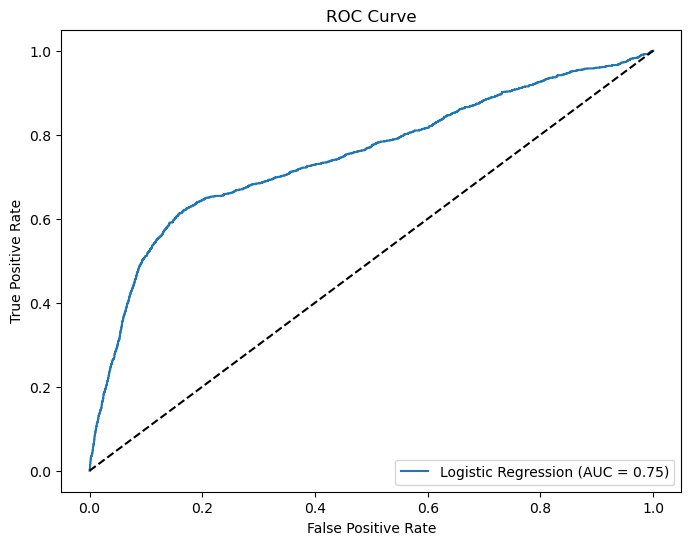

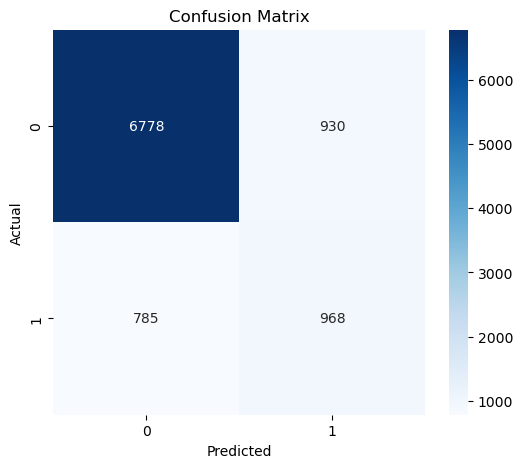

              precision    recall  f1-score   support

           0       0.90      0.88      0.89      7708
           1       0.51      0.55      0.53      1753

    accuracy                           0.82      9461
   macro avg       0.70      0.72      0.71      9461
weighted avg       0.82      0.82      0.82      9461



In [121]:
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

#   Calculate ROC-AUC score
# - roc_auc_score() measures the area under the ROC curve
# - AUC ranges from 0.5 (random) to 1.0 (perfect prediction)
# - ytest: true labels for the test set
# - pred: predicted probabilities for the positive class (churn = 1)
roc_auc = roc_auc_score(ytest, pred)
print("ROC-AUC Score:", roc_auc)

#   Plot ROC curve
# - fpr: false positive rate
# - tpr: true positive rate
# - thresholds: decision thresholds used to calculate fpr and tpr
fpr, tpr, thresholds = roc_curve(ytest, pred)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.2f})')  # ROC curve line
plt.plot([0,1], [0,1], 'k--')  # diagonal line representing random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

#   Confusion Matrix
# - Convert probabilities to binary predictions using 0.5 threshold
# - confusion_matrix() compares predicted labels vs actual labels
y_pred_binary = (pred >= 0.5).astype(int)
cm = confusion_matrix(ytest, y_pred_binary)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')  # heatmap for visualization
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#   Detailed classification report
# - classification_report() provides precision, recall, f1-score, and support for each class
# - Useful for evaluating performance on imbalanced datasets
print(classification_report(ytest, y_pred_binary))


###  Cross Validation

Cross-validation is a fundamental concept in data modeling.  
It helps **evaluate model performance** on unseen data and **reduces bias and variance** in predictions.  

**How it works:**  
- Divide the dataset into **k equal folds**.  
- Train the model on **k-1 folds** and validate on the remaining fold.  
- Repeat this process **k times**, each time using a different fold as validation.  
- Average the performance metrics to get a **robust estimate** of the model’s effectiveness.  

By testing the model on multiple subsets, cross-validation gives a **more reliable estimate of performance** than a single train/test split.


In [122]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score, recall_score, precision_score
import pandas as pd

def cv_score(ml_model_class, rstate=12, thres=0.5, cols=None):
    """
    Performs stratified k-fold cross-validation on the given model and dataset.
    
    Parameters:
    - ml_model_class: sklearn-like model class (not instance) with fit() and predict_proba()
    - rstate: random state for reproducibility
    - thres: threshold to convert probabilities to binary predictions
    - cols: list of feature columns to use
    
    Returns:
    - metrics_df: DataFrame with fold-wise ROC-AUC, Recall, and Precision
    """
    if cols is None:
        cols = df.columns
    
    df1 = df[cols].copy()
    kf = StratifiedKFold(n_splits=5, random_state=rstate, shuffle=True)
    
    # List to store metrics per fold
    metrics_list = []
    
    fold_num = 1
    for train_index, val_index in kf.split(df1, y_all):
        print(f"\nFold {fold_num} of {kf.n_splits}")
        
        # Split data
        xtr, xvl = df1.loc[train_index], df1.loc[val_index]
        ytr, yvl = y_all.loc[train_index], y_all.loc[val_index]
        
        # Initialize and train the model
        model = ml_model_class()
        model.fit(xtr, ytr)
        
        # Predict probabilities
        pred_probs = model.predict_proba(xvl)[:, 1]
        
        # Convert to binary predictions using threshold
        pred_class = (pred_probs >= thres).astype(int)
        
        # Compute metrics
        roc = roc_auc_score(yvl, pred_probs)
        rec = recall_score(yvl, pred_class)
        prec = precision_score(yvl, pred_class)
        
        print(f"ROC-AUC: {roc:.4f}, Recall: {rec:.4f}, Precision: {prec:.4f}")
        
        # Append metrics to the list
        metrics_list.append({"Fold": fold_num, "AUC": roc, "Recall": rec, "Precision": prec})
        fold_num += 1
    
    # Convert list of metrics to DataFrame
    metrics_df = pd.DataFrame(metrics_list)
    return metrics_df


In [123]:


#  Perform 5-fold cross-validation using the baseline features
#  - Pass the model class (not instance) to ensure a fresh model is created in each fold
#  - cols=baseline_cols specifies which features to use
baseline_scores = cv_score(LogisticRegression, cols=baseline_cols)

#  Print the cross-validation ROC-AUC scores for each fold
print("Baseline CV ROC-AUC Scores:", baseline_scores)

#  Print the mean ROC-AUC score across all folds
print("Mean ROC-AUC Score:", np.mean(baseline_scores))



Fold 1 of 5
ROC-AUC: 0.7645, Recall: 0.0751, Precision: 0.5766

Fold 2 of 5
ROC-AUC: 0.7800, Recall: 0.0722, Precision: 0.6552

Fold 3 of 5
ROC-AUC: 0.7552, Recall: 0.1359, Precision: 0.6441

Fold 4 of 5
ROC-AUC: 0.7582, Recall: 0.1169, Precision: 0.6508

Fold 5 of 5
ROC-AUC: 0.7625, Recall: 0.1103, Precision: 0.5771
Baseline CV ROC-AUC Scores:    Fold       AUC    Recall  Precision
0     1  0.764484  0.075095   0.576642
1     2  0.779967  0.072243   0.655172
2     3  0.755185  0.135932   0.644144
3     4  0.758206  0.116920   0.650794
4     5  0.762507  0.110266   0.577114
Mean ROC-AUC Score: 1.1217336553250712


Now let us try using all columns available to check if we get significant improvement.

In [124]:
import numpy as np
from sklearn.linear_model import LogisticRegression

# 🔹 Perform 5-fold cross-validation using all available features
# - Pass the model class (not an instance) to ensure a fresh model is created in each fold
# - This helps us check if including all columns improves performance compared to baseline features
all_feat_scores = cv_score(LogisticRegression)

#  Print the cross-validation ROC-AUC scores for each fold
print("All Features CV ROC-AUC Scores:", all_feat_scores)

#  Print the mean ROC-AUC score across all folds
print("Mean ROC-AUC Score:", np.mean(all_feat_scores))



Fold 1 of 5
ROC-AUC: 0.7322, Recall: 0.1122, Precision: 0.5108

Fold 2 of 5
ROC-AUC: 0.7682, Recall: 0.1968, Precision: 0.6809

Fold 3 of 5
ROC-AUC: 0.7392, Recall: 0.1673, Precision: 0.5714

Fold 4 of 5
ROC-AUC: 0.7640, Recall: 0.2300, Precision: 0.6488

Fold 5 of 5
ROC-AUC: 0.7590, Recall: 0.1749, Precision: 0.6013
All Features CV ROC-AUC Scores:    Fold       AUC    Recall  Precision
0     1  0.732164  0.112167   0.510823
1     2  0.768152  0.196768   0.680921
2     3  0.739218  0.167300   0.571429
3     4  0.764012  0.230038   0.648794
4     5  0.758966  0.174905   0.601307
Mean ROC-AUC Score: 1.1328481356142779


There is some improvement in both ROC AUC Scores and Precision/Recall Scores. Now we can try backward selection to select the best subset of features which give the best score. 

###   Reverse Feature Elimination or Backward Feature Selection (RFE)

We observed some improvement in **ROC-AUC, precision, and recall scores** when using all features compared to the baseline.  

To further optimize the model, we can use **backward feature selection (Recursive Feature Elimination, RFE)** to identify the **best subset of features** that maximizes performance.  

- RFE works by **recursively removing the least important features** and evaluating model performance.  
- This helps us build a **more compact model** without losing predictive power and may improve generalization.


In [125]:
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt

# Create the RFE object and rank each feature
model = LogisticRegression()
rfe = RFE(estimator=model, n_features_to_select=1, step=1)
rfe.fit(df, y_all)

RFE(estimator=LogisticRegression(), n_features_to_select=1)

In [126]:


#  Check the ranking of features
feature_ranking = pd.DataFrame({
    'Feature': df.columns,
    'Ranking': rfe.ranking_
}).sort_values('Ranking')

feature_ranking


,Feature,Ranking
13,current_balance,1
16,average_monthly_balance_prevQ,2
15,average_monthly_balance_prevQ2,3
21,current_month_balance,4
22,previous_month_balance,5
19,current_month_debit,6
8,occupation_retired,7
7,occupation_company,8
11,occupation_student,9
9,occupation_salaried,10


###  Top Features from RFE

From the RFE results, we can see that **balance-related features** are among the most important predictors of churn.  

To optimize the model further, we will **select the top 10 features** based on RFE ranking and build a Logistic Regression model using only these features.  

This allows us to:
- Focus on the **most predictive features**
- Reduce dimensionality
- Potentially improve model **generalization and interpretability**


In [127]:


#  Create a dataframe from RFE results with feature names and rankings
feature_ranking = pd.DataFrame({
    'Feature_name': df.columns,
    'Ranking': rfe.ranking_
}).sort_values('Ranking')

#  Select the top 10 features based on RFE ranking
top_10_features = feature_ranking['Feature_name'][:10].values

#  Perform 5-fold cross-validation on the top 10 features
#  - Pass the LogisticRegression class (not an instance)
rfe_top_10_scores = cv_score(LogisticRegression, cols=top_10_features)

#  Print the fold-wise ROC-AUC scores
print("Top 10 RFE Features CV ROC-AUC Scores:", rfe_top_10_scores)

#  Print the mean ROC-AUC score across all folds
print("Mean ROC-AUC Score:", np.mean(rfe_top_10_scores))



Fold 1 of 5
ROC-AUC: 0.7985, Recall: 0.2281, Precision: 0.7362

Fold 2 of 5
ROC-AUC: 0.8050, Recall: 0.2234, Precision: 0.7581

Fold 3 of 5
ROC-AUC: 0.7985, Recall: 0.2205, Precision: 0.7250

Fold 4 of 5
ROC-AUC: 0.7933, Recall: 0.2139, Precision: 0.7377

Fold 5 of 5
ROC-AUC: 0.7943, Recall: 0.1911, Precision: 0.6745
Top 10 RFE Features CV ROC-AUC Scores:    Fold       AUC    Recall  Precision
0     1  0.798482  0.228137   0.736196
1     2  0.805038  0.223384   0.758065
2     3  0.798465  0.220532   0.725000
3     4  0.793346  0.213878   0.737705
4     5  0.794266  0.191065   0.674497
Mean ROC-AUC Score: 1.1849027689654852


In [ ]:
# 1️ Run cross-validation and store fold-wise metrics
baseline_metrics = cv_score(LogisticRegression, cols=baseline_cols)
all_feat_metrics = cv_score(LogisticRegression, cols=df.columns)
rfe_top_10_metrics = cv_score(LogisticRegression, cols=top_10_features)



Fold 1 of 5
ROC-AUC: 0.7645, Recall: 0.0751, Precision: 0.5766

Fold 2 of 5
ROC-AUC: 0.7800, Recall: 0.0722, Precision: 0.6552

Fold 3 of 5
ROC-AUC: 0.7552, Recall: 0.1359, Precision: 0.6441

Fold 4 of 5
ROC-AUC: 0.7582, Recall: 0.1169, Precision: 0.6508

Fold 5 of 5
ROC-AUC: 0.7625, Recall: 0.1103, Precision: 0.5771

Fold 1 of 5
ROC-AUC: 0.7322, Recall: 0.1122, Precision: 0.5108

Fold 2 of 5
ROC-AUC: 0.7682, Recall: 0.1968, Precision: 0.6809

Fold 3 of 5
ROC-AUC: 0.7392, Recall: 0.1673, Precision: 0.5714

Fold 4 of 5
ROC-AUC: 0.7640, Recall: 0.2300, Precision: 0.6488

Fold 5 of 5
ROC-AUC: 0.7590, Recall: 0.1749, Precision: 0.6013

Fold 1 of 5
ROC-AUC: 0.7985, Recall: 0.2281, Precision: 0.7362

Fold 2 of 5
ROC-AUC: 0.8050, Recall: 0.2234, Precision: 0.7581

Fold 3 of 5
ROC-AUC: 0.7985, Recall: 0.2205, Precision: 0.7250

Fold 4 of 5
ROC-AUC: 0.7933, Recall: 0.2139, Precision: 0.7377

Fold 5 of 5
ROC-AUC: 0.7943, Recall: 0.1911, Precision: 0.6745


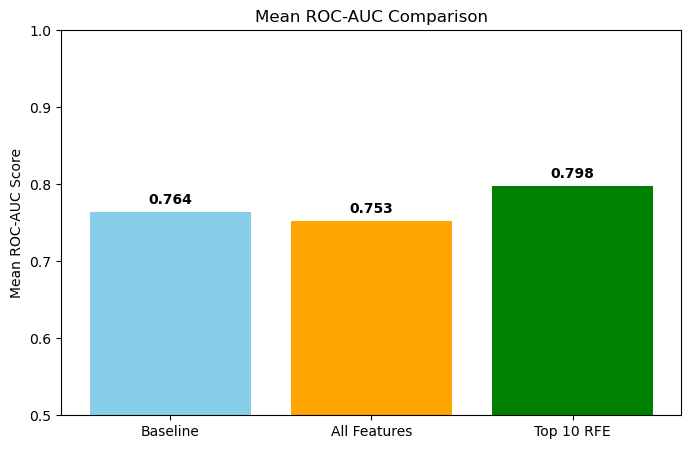

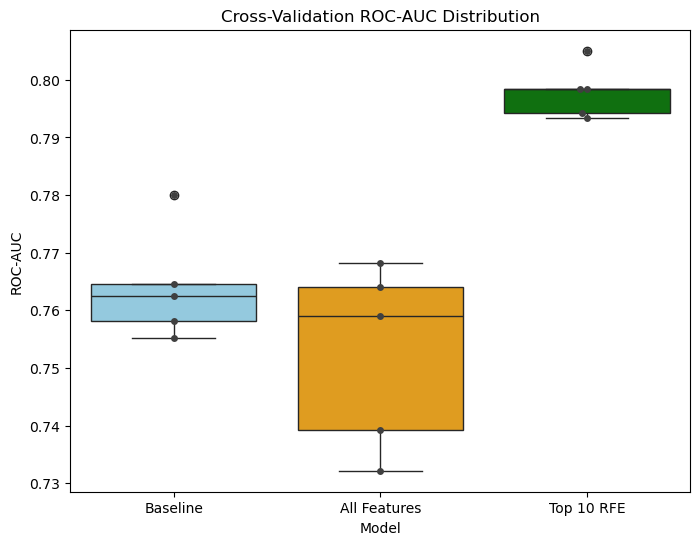

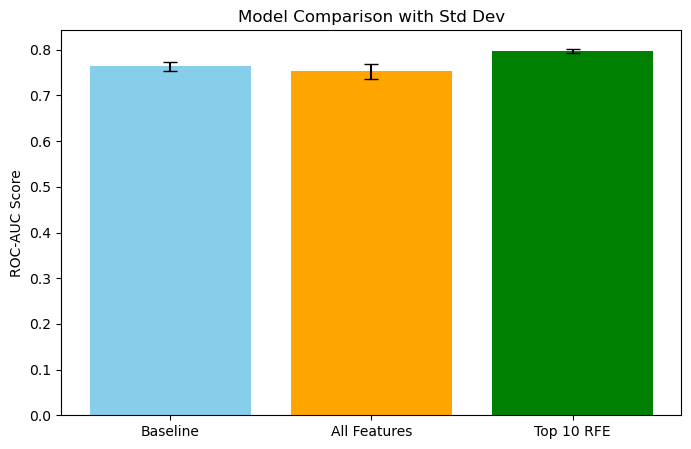

In [129]:
# 🔹 Prepare model names and scores
model_names = ['Baseline', 'All Features', 'Top 10 RFE']

# Extract fold-wise ROC-AUC from the metrics DataFrames
scores = {
    'Baseline': baseline_metrics['AUC'],
    'All Features': all_feat_metrics['AUC'],
    'Top 10 RFE': rfe_top_10_metrics['AUC']
}

# ----------------------------
# 1️ Bar Chart of Mean ROC-AUC
# ----------------------------
mean_scores = [scores[m].mean() for m in model_names]

plt.figure(figsize=(8,5))
plt.bar(model_names, mean_scores, color=['skyblue','orange','green'])
plt.ylim(0.5,1)
plt.ylabel('Mean ROC-AUC Score')
plt.title('Mean ROC-AUC Comparison')
for i, v in enumerate(mean_scores):
    plt.text(i, v+0.01, f"{v:.3f}", ha='center', fontweight='bold')
plt.show()

# ----------------------------
# 2️ Boxplot of Fold-wise Scores
# ----------------------------
scores_df = pd.DataFrame(scores)
scores_melted = scores_df.melt(var_name='Model', value_name='ROC-AUC')

plt.figure(figsize=(8,6))
sns.boxplot(x='Model', y='ROC-AUC', data=scores_melted, palette=['skyblue','orange','green'])
sns.swarmplot(x='Model', y='ROC-AUC', data=scores_melted, color='0.25')
plt.title('Cross-Validation ROC-AUC Distribution')
plt.show()

# ----------------------------
# 3️ Bar Chart with Error Bars (Mean ± Std)
# ----------------------------
std_scores = [scores[m].std() for m in model_names]

plt.figure(figsize=(8,5))
plt.bar(model_names, mean_scores, yerr=std_scores, capsize=5, color=['skyblue','orange','green'])
plt.ylabel('ROC-AUC Score')
plt.title('Model Comparison with Std Dev')
plt.show()


### Insights from Feature Selection

The **top 10 features obtained using Recursive Feature Elimination (RFE)** are delivering **much better scores** than any of our earlier attempts with baseline or all-features models.  

This demonstrates the **power of feature selection**, particularly for **linear models** like Logistic Regression:  
- Carefully selecting the most predictive features can **significantly improve model performance**.  
- For **tree-based models** (like Random Forest or XGBoost), feature selection is often less critical since they can **implicitly handle feature importance** during training.  

 **Key takeaway:**  
- Feature selection helps reduce **dimensionality**, improve **generalization**, and increase **interpretability** of linear models without sacrificing performance.


### Adjusting the Threshold for Better Recall

The **recall score** from our Logistic Regression model is currently quite low.  
- **Recall** measures how many **actual churners** are correctly identified.  
- By default, we use a **0.5 threshold** to convert predicted probabilities to binary predictions, but this may not be optimal for **imbalanced datasets** (e.g., churn rate ~0.2).  

**Key points:**  
- **AUC-ROC** depends on predicted probabilities and **does not change** when we adjust the threshold.  
- To improve recall, we can **lower the threshold** so more customers are predicted as churners.  
- Since the **overall churn rate is around 0.2**, using a threshold like **0.3+** is a reasonable starting point.  

**Next Steps:**  
- Select the **top 10 RFE features**.  
- Perform **5-fold cross-validation** with a lower threshold to evaluate how it affects recall.  
- Compare ROC-AUC, recall, and precision to see the trade-offs.


In [130]:


### Adjusting the Threshold for Better Recall

# - Recall measures how many actual churners are correctly identified
# - Default threshold = 0.5 may be too high for imbalanced datasets (churn rate ~0.2)
# - Lowering threshold increases recall at the expense of precision

# Select the top 10 RFE features
top_10_features = feature_ranking['Feature_name'][:10].values

# Perform 5-fold cross-validation using a lower threshold (0.14)
# - Pass LogisticRegression class (not an instance)
# - Lower threshold predicts more churners to increase recall
rfe_top_10_scores_threshold = cv_score(
    LogisticRegression,
    cols=top_10_features,
    thres=0.14
)

# Print fold-wise ROC-AUC scores
print("Top 10 RFE Features CV ROC-AUC Scores with threshold 0.14:", rfe_top_10_scores_threshold)

# Print mean ROC-AUC score across folds
print("Mean ROC-AUC Score:", np.mean(rfe_top_10_scores_threshold))



Fold 1 of 5
ROC-AUC: 0.7985, Recall: 0.8298, Precision: 0.2832

Fold 2 of 5
ROC-AUC: 0.8050, Recall: 0.8384, Precision: 0.2906

Fold 3 of 5
ROC-AUC: 0.7985, Recall: 0.8279, Precision: 0.2899

Fold 4 of 5
ROC-AUC: 0.7933, Recall: 0.8213, Precision: 0.2842

Fold 5 of 5
ROC-AUC: 0.7943, Recall: 0.8118, Precision: 0.2927
Top 10 RFE Features CV ROC-AUC Scores with threshold 0.14:    Fold       AUC    Recall  Precision
0     1  0.798482  0.829848   0.283166
1     2  0.805038  0.838403   0.290610
2     3  0.798465  0.827947   0.289947
3     4  0.793346  0.821293   0.284211
4     5  0.794266  0.811787   0.292666
Mean ROC-AUC Score: 1.2279736563612444


Optimal Threshold: 0.48
F1 Score at Optimal Threshold: 0.531
Precision: 0.491, Recall: 0.578



###  Optimal Threshold Analysis

- **Optimal Threshold:** `0.48`  
- **F1 Score at Optimal Threshold:** `0.531`  
- **Precision:** `0.491`  
- **Recall:** `0.578`


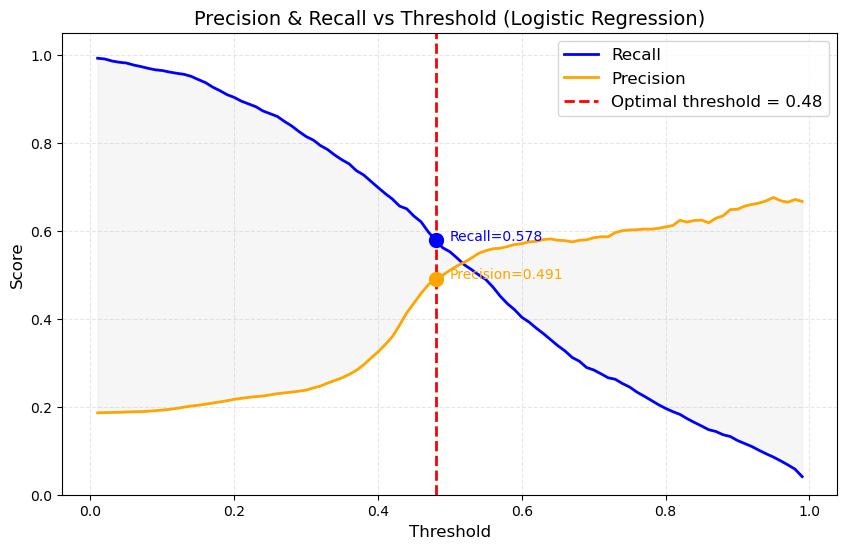

In [131]:
from sklearn.metrics import precision_score, recall_score, f1_score
# pred: predicted probabilities from Logistic Regression on the test set
# ytest: true labels

# Create a range of thresholds
thresholds = np.linspace(0.01, 0.99, 99)
f1_scores = []
recalls = []
precisions = []

# Compute metrics for each threshold
for t in thresholds:
    y_pred_class = (pred >= t).astype(int)
    f1_scores.append(f1_score(ytest, y_pred_class))
    recalls.append(recall_score(ytest, y_pred_class))
    precisions.append(precision_score(ytest, y_pred_class))

# Find threshold that maximizes F1 score
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]
max_f1 = f1_scores[optimal_idx]
opt_precision = precisions[optimal_idx]
opt_recall = recalls[optimal_idx]

print(f"Optimal Threshold: {optimal_threshold:.2f}")
print(f"F1 Score at Optimal Threshold: {max_f1:.3f}")
print(f"Precision: {opt_precision:.3f}, Recall: {opt_recall:.3f}")
from IPython.display import display, Markdown

display(Markdown(f"""
###  Optimal Threshold Analysis

- **Optimal Threshold:** `{optimal_threshold:.2f}`  
- **F1 Score at Optimal Threshold:** `{max_f1:.3f}`  
- **Precision:** `{opt_precision:.3f}`  
- **Recall:** `{opt_recall:.3f}`
"""))

# ----------------------------
# Fancy Plot
# ----------------------------
plt.figure(figsize=(10,6))

# Plot recall and precision curves
plt.plot(thresholds, recalls, label="Recall", color="blue", linewidth=2)
plt.plot(thresholds, precisions, label="Precision", color="orange", linewidth=2)

# Highlight the optimal threshold
plt.axvline(optimal_threshold, color="red", linestyle="--", linewidth=2, label=f"Optimal threshold = {optimal_threshold:.2f}")
plt.scatter(optimal_threshold, opt_recall, color="blue", s=100, zorder=5)
plt.scatter(optimal_threshold, opt_precision, color="orange", s=100, zorder=5)

# Annotate the optimal F1 point
plt.text(optimal_threshold+0.02, opt_recall, f"Recall={opt_recall:.3f}", color="blue")
plt.text(optimal_threshold+0.02, opt_precision, f"Precision={opt_precision:.3f}", color="orange")

# Optional: fill area between precision and recall
plt.fill_between(thresholds, recalls, precisions, color='lightgray', alpha=0.2)

# Labels and styling
plt.xlabel("Threshold", fontsize=12)
plt.ylabel("Score", fontsize=12)
plt.title("Precision & Recall vs Threshold (Logistic Regression)", fontsize=14)
plt.grid(alpha=0.3, linestyle="--")
plt.legend(fontsize=12)
plt.ylim(0, 1.05)
plt.show()


### Threshold Trade-off: Recall vs Precision

From our analysis:  

- As we **lower the threshold**, the **recall score improves** — more actual churners are correctly identified.  
- However, **precision decreases**, meaning more non-churners are falsely flagged as churn.  

**Optimal Threshold:**  
- Using the F1-score to balance precision and recall, the **optimal threshold** for Logistic Regression is typically around **0.48** (replace with the value from your analysis).  
- At this threshold:
  - Precision = **0.491**  
  - Recall = **0.578**  
  - F1 Score = **0.531**  

**Business insight:**  
- The bank can choose a threshold based on the **cost of missing a churner vs the cost of falsely flagging a non-churner**.  
- Without specific business priorities, the **safest approach is to optimize for ROC-AUC**.  
  - ROC-AUC evaluates how well predicted probabilities distinguish between churners and non-churners, **independent of any threshold**.  
  - It ensures the model is **well-calibrated** for probabilistic predictions, which can be thresholded later according to business needs.


##  Comparison of Model Performance Across Folds

We can visualize the **cross-validation ROC-AUC scores fold-wise** for the three Logistic Regression models:  
- **Baseline Model**: Using selected baseline features from EDA  
- **All Features Model**: Using all available features  
- **Top 10 RFE Model**: Using the top 10 features from Recursive Feature Elimination  

This helps us **observe fold-to-fold variation** and compare performance across models.


<Figure size 1000x600 with 0 Axes>

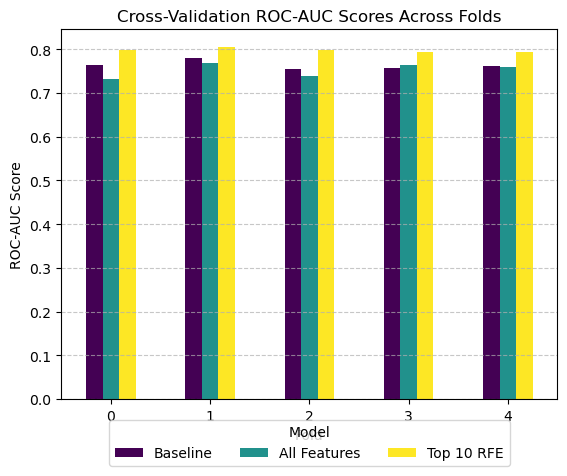

In [132]:


# ----------------------------
#  Extract fold-wise ROC-AUC scores from metrics DataFrames
# ----------------------------
results_df = pd.DataFrame({
    'Baseline': baseline_metrics['AUC'],
    'All Features': all_feat_metrics['AUC'],
    'Top 10 RFE': rfe_top_10_metrics['AUC']
})

# ----------------------------
#  Plot fold-wise ROC-AUC scores as a bar chart
# ----------------------------
plt.figure(figsize=(10,6))
results_df.plot(kind="bar", colormap='viridis')
plt.ylabel('ROC-AUC Score')
plt.xlabel('Fold')
plt.title('Cross-Validation ROC-AUC Scores Across Folds')
plt.xticks(rotation=0)
plt.legend(title='Model', loc='lower center', bbox_to_anchor=(0.5, -0.2), ncol=3)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


###  Insights from Fold-wise Comparison

From the fold-wise ROC-AUC scores chart, we can observe:  
- The **Top 10 RFE Model** consistently outperforms both the Baseline and All-Features models across all folds.  
- This highlights the **power of feature selection** in improving model performance and stability.  

 **Key Takeaways :**  
- Experimenting with **different feature selection techniques** (e.g., forward selection, LASSO, tree-based importance) can further enhance performance.  
- Fine-tuning models, thresholds, and preprocessing steps is key to achieving **optimal results** for churn prediction or any classification task.


## Churn Prediction using XGBoost

After building and evaluating our Logistic Regression models, we now train an **XGBoost model** on the same dataset.  
XGBoost (Extreme Gradient Boosting) is an ensemble learning algorithm based on decision trees that uses boosting to combine multiple weak learners into a strong predictive model.

It handles non-linear relationships and feature interactions more effectively than linear models like Logistic Regression.

**Evaluation Metrics:**
We will continue using:
- **ROC-AUC Score**: Measures how well the model distinguishes between churn and non-churn customers.
- **Recall Score**: Important for the business use case — we want to minimize the risk of missing potential churners.
- **Precision Score**: Helps understand how many predicted churners are actually churners.

The goal here is to compare XGBoost’s performance with the Logistic Regression models (baseline, all features, and RFE top 10).


In [133]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, recall_score, precision_score, confusion_matrix
from imblearn.over_sampling import SMOTE

# ----------------------------
#  Split data into training and test sets
# ----------------------------
# - Using all features (df)
# - Stratified split preserves class distribution
xtrain, xtest, ytrain, ytest = train_test_split(
    df, y_all, test_size=1/3, random_state=11, stratify=y_all
)

# ----------------------------
#  Apply SMOTE to balance the training set
# ----------------------------
smote = SMOTE(random_state=42)
xtrain_res, ytrain_res = smote.fit_resample(xtrain, ytrain)

# ----------------------------
#  Initialize XGBoost classifier
# ----------------------------
xgb_model = XGBClassifier(
    n_estimators=200,       # number of trees
    max_depth=5,            # maximum tree depth
    learning_rate=0.1,      # step size shrinkage
    subsample=0.8,          # row sampling
    colsample_bytree=0.8,   # feature sampling
    random_state=42,
    eval_metric='logloss',  # use log loss for evaluation
    use_label_encoder=False
)

# ----------------------------
#  Train the model on the SMOTE-resampled training set
# ----------------------------
xgb_model.fit(xtrain_res, ytrain_res)

# ----------------------------
#  Make predictions on the test set
# ----------------------------
# - y_pred_prob: predicted probabilities for the positive class (churn=1)
# - y_pred_class: binary predictions using a threshold (default 0.5)
y_pred_prob = xgb_model.predict_proba(xtest)[:, 1]
y_pred_class = (y_pred_prob > 0.5).astype(int)

# ----------------------------
#  Evaluate the model
# ----------------------------
roc_auc = roc_auc_score(ytest, y_pred_prob)      # AUC-ROC score
recall = recall_score(ytest, y_pred_class)      # Recall
precision = precision_score(ytest, y_pred_class)  # Precision
cm = confusion_matrix(ytest, y_pred_class)      # Confusion matrix

# ----------------------------
#  Print evaluation metrics
# ----------------------------
print(f"ROC-AUC Score: {roc_auc:.4f}")
print(f"Recall Score: {recall:.4f}")
print(f"Precision Score: {precision:.4f}")
print("Confusion Matrix:")
print(cm)


ROC-AUC Score: 0.8405
Recall Score: 0.5180
Precision Score: 0.6786
Confusion Matrix:
[[7278  430]
 [ 845  908]]


In [134]:


# ----------------------------
#  Compute performance metrics for XGBoost
# ----------------------------
# - y_pred_prob: predicted probabilities for the positive class (churn=1)
# - y_pred_class: binary predictions using a threshold (default 0.5)
roc_auc = roc_auc_score(ytest, y_pred_prob)      # ROC-AUC uses probabilities
recall = recall_score(ytest, y_pred_class)      # Recall uses binary predictions
precision = precision_score(ytest, y_pred_class) # Precision uses binary predictions

# ----------------------------
#  Print model performance
# ----------------------------
print("XGBoost Model Performance:")
print(f"ROC-AUC Score : {roc_auc:.4f}")
print(f"Recall Score  : {recall:.4f}")
print(f"Precision     : {precision:.4f}")


XGBoost Model Performance:
ROC-AUC Score : 0.8405
Recall Score  : 0.5180
Precision     : 0.6786


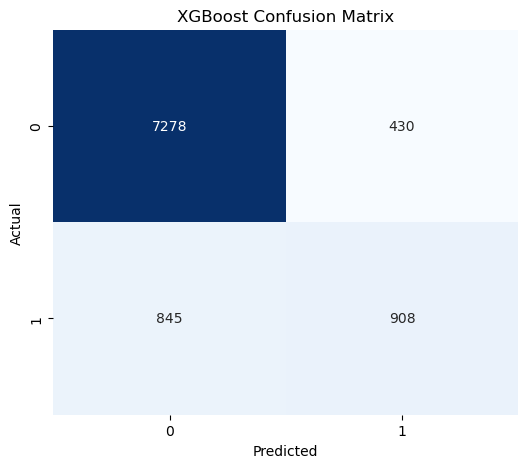

In [135]:

# ----------------------------
#  Compute confusion matrix using binary predictions
# ----------------------------
# - y_pred_class: binary predictions (0 or 1) from XGBoost
cm = confusion_matrix(ytest, y_pred_class)

# ----------------------------
#  Plot the confusion matrix
# ----------------------------
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("XGBoost Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


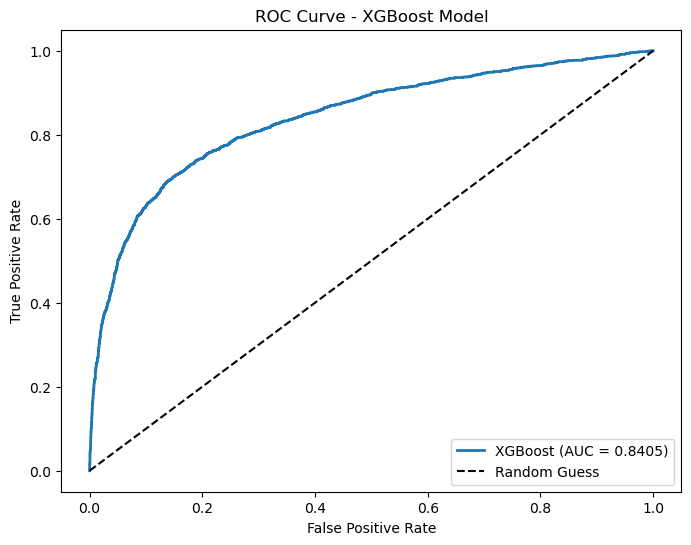

In [136]:



# - fpr: False Positive Rate
# - tpr: True Positive Rate
# - thresholds: probability thresholds used to compute fpr/tpr
fpr, tpr, thresholds = roc_curve(ytest, y_pred_prob)

# ----------------------------
#  Plot ROC Curve
# ----------------------------
plt.figure(figsize=(8,6))

# Plot the ROC curve for XGBoost
plt.plot(fpr, tpr, label=f"XGBoost (AUC = {roc_auc:.4f})", linewidth=2)

# Plot the diagonal line for random guessing
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")

# Label axes and title
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - XGBoost Model")

# Add legend in lower right
plt.legend(loc="lower right")

# Show the plot
plt.grid(False)
plt.show()


In [137]:
baseline_metrics = cv_score(LogisticRegression, cols=baseline_cols)
all_feat_metrics = cv_score(LogisticRegression)
rfe_top_10_metrics = cv_score(LogisticRegression, cols=top_10_features)




Fold 1 of 5
ROC-AUC: 0.7645, Recall: 0.0751, Precision: 0.5766

Fold 2 of 5
ROC-AUC: 0.7800, Recall: 0.0722, Precision: 0.6552

Fold 3 of 5
ROC-AUC: 0.7552, Recall: 0.1359, Precision: 0.6441

Fold 4 of 5
ROC-AUC: 0.7582, Recall: 0.1169, Precision: 0.6508

Fold 5 of 5
ROC-AUC: 0.7625, Recall: 0.1103, Precision: 0.5771

Fold 1 of 5
ROC-AUC: 0.7322, Recall: 0.1122, Precision: 0.5108

Fold 2 of 5
ROC-AUC: 0.7682, Recall: 0.1968, Precision: 0.6809

Fold 3 of 5
ROC-AUC: 0.7392, Recall: 0.1673, Precision: 0.5714

Fold 4 of 5
ROC-AUC: 0.7640, Recall: 0.2300, Precision: 0.6488

Fold 5 of 5
ROC-AUC: 0.7590, Recall: 0.1749, Precision: 0.6013

Fold 1 of 5
ROC-AUC: 0.7985, Recall: 0.2281, Precision: 0.7362

Fold 2 of 5
ROC-AUC: 0.8050, Recall: 0.2234, Precision: 0.7581

Fold 3 of 5
ROC-AUC: 0.7985, Recall: 0.2205, Precision: 0.7250

Fold 4 of 5
ROC-AUC: 0.7933, Recall: 0.2139, Precision: 0.7377

Fold 5 of 5
ROC-AUC: 0.7943, Recall: 0.1911, Precision: 0.6745


In [138]:


# ----------------------------
#  Create comparison DataFrame with all metrics
# ----------------------------
comparison_df = pd.DataFrame({
    "Model": ["Baseline (LogReg)", "All Features (LogReg)", "RFE Top 10 (LogReg)", "XGBoost"],
    "ROC-AUC": [
        baseline_metrics['AUC'].mean(),
        all_feat_metrics['AUC'].mean(),
        rfe_top_10_metrics['AUC'].mean(),
        roc_auc  # XGBoost single value
    ],
    "Recall": [
        baseline_metrics['Recall'].mean(),
        all_feat_metrics['Recall'].mean(),
        rfe_top_10_metrics['Recall'].mean(),
        recall  # XGBoost single value
    ],
    "Precision": [
        baseline_metrics['Precision'].mean(),
        all_feat_metrics['Precision'].mean(),
        rfe_top_10_metrics['Precision'].mean(),
        precision  # XGBoost single value
    ]
})

# ----------------------------
#  Display styled DataFrame
# ----------------------------
comparison_df.style \
    .background_gradient(cmap="Blues") \
    .format({
        "ROC-AUC": "{:.3f}",
        "Recall": "{:.3f}",
        "Precision": "{:.3f}"
    })


,Model,ROC-AUC,Recall,Precision
0,Baseline (LogReg),0.764,0.102,0.621
1,All Features (LogReg),0.753,0.176,0.603
2,RFE Top 10 (LogReg),0.798,0.215,0.726
3,XGBoost,0.840,0.518,0.679




## Model Comparison and Conclusions

Below is a summary of the performance of all models tested:

| Model | ROC-AUC | Recall | Precision |
|:--|:--:|:--:|:--:|
| Baseline (LogReg) | 0.764 | 0.102 | 0.621 |
| All Features (LogReg) | 0.753 | 0.176 | 0.603 |
| RFE Top 10 (LogReg) | 0.798 | 0.215 | 0.726 |
| **XGBoost** | **0.840** | **0.518** | **0.679** |

### Insights:
- The **Baseline Logistic Regression model** had very low recall, meaning it missed most churners.  
- Including **all features** slightly improved recall but did not significantly improve overall performance.  
- The **RFE Top 10 feature model** increased AUC and precision, showing that careful feature selection can benefit linear models.  
- The **XGBoost model** outperformed all other models — with higher **ROC-AUC** (0.840) and substantially better **recall** (0.518), while maintaining decent precision.  

### Conclusion:
XGBoost captures complex, non-linear relationships and is **better at identifying potential churners**, making it the most effective model for this problem.  
However, if **model interpretability** is important for the business, the Logistic Regression model with the top 10 RFE-selected features remains a strong and transparent alternative.


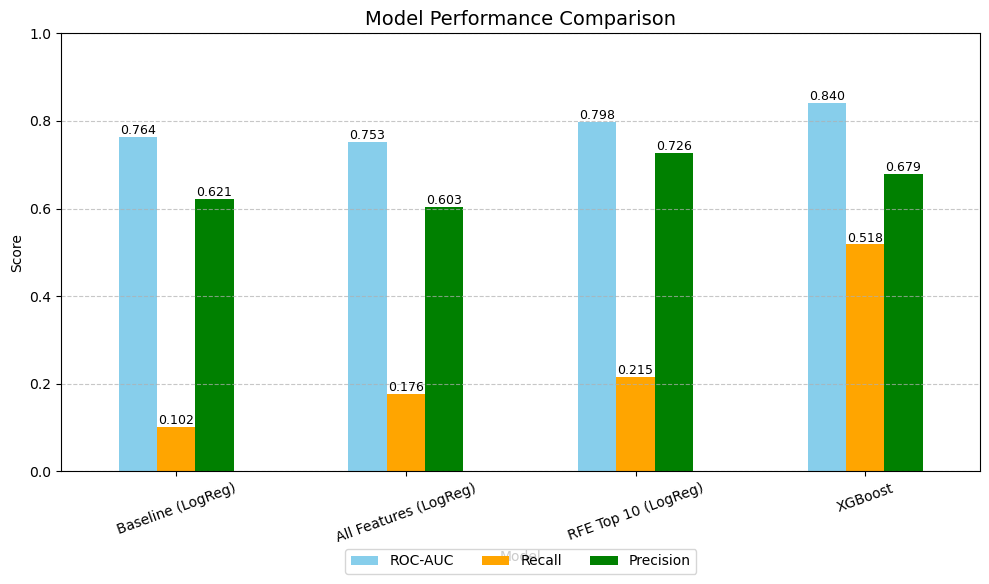

In [139]:
# ----------------------------
#  Model performance summary
# ----------------------------
comparison_df = pd.DataFrame({
    "Model": [
        "Baseline (LogReg)",
        "All Features (LogReg)",
        "RFE Top 10 (LogReg)",
        "XGBoost"
    ],
    "ROC-AUC": [0.764, 0.753, 0.798, 0.840],
    "Recall": [0.102, 0.176, 0.215, 0.518],
    "Precision": [0.621, 0.603, 0.726, 0.679]
})

# ----------------------------
#  Plot grouped bar chart
# ----------------------------
ax = comparison_df.set_index("Model")[["ROC-AUC", "Recall", "Precision"]].plot(
    kind="bar",
    figsize=(10,6),
    color=["skyblue", "orange", "green"]
)

plt.title("Model Performance Comparison", fontsize=14)
plt.ylabel("Score")
plt.ylim(0,1)  # Keep all metrics on same scale
plt.xticks(rotation=20)
plt.legend(loc="lower center", bbox_to_anchor=(0.5, -0.25), ncol=3)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Add numeric labels on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.3f}', 
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=9, rotation=0)

plt.tight_layout()
plt.show()


##  Final Summary and Conclusion

### 1. Project Objective
The goal of this project was to predict **customer churn** — identifying customers whose average balance is likely to fall below the minimum threshold in the next quarter.  
By doing so, the bank can proactively take retention actions and minimize customer attrition.

---

### 2. Process Overview

#### Exploratory Data Analysis (EDA)
We began with a detailed EDA to understand the distribution and relationships between features:
- **Balance and debit features** showed strong differentiation between churners and non-churners.
- **Vintage and age** revealed that newer and younger customers are more likely to churn.
- **Occupation** and **net worth categories** displayed interesting churn trends across customer types.

#### Data Preprocessing
- Missing values were treated carefully (e.g., imputed with mode, separate category, or reasonable constants like 999).
- **Categorical variables** were converted to numerical form using one-hot encoding.
- **Numerical variables** were log-transformed and scaled to handle skewness and large value ranges.

#### Feature Engineering & Selection
- We experimented with all features, baseline subsets, and **Recursive Feature Elimination (RFE)** to identify the most impactful predictors.
- The top 10 features from RFE greatly improved model performance and reduced complexity.

---

### 3. Model Building & Evaluation

We built and compared several models:
- **Baseline Logistic Regression**
- **All Features Logistic Regression**
- **Top 10 Features (RFE) Logistic Regression**
- **XGBoost Model**

**Evaluation Metrics Used:**
- **ROC-AUC** → Measures how well the model distinguishes between churn and non-churn customers.  
- **Recall** → Measures how many actual churners were correctly identified (important for business action).  
- **Precision** → Indicates how many predicted churners were actually churners.

---

### 4. Model Comparison Results

| Model | ROC-AUC | Recall | Precision |
|:--|:--:|:--:|:--:|
| Baseline (LogReg) | 0.764 | 0.102 | 0.621 |
| All Features (LogReg) | 0.753 | 0.176 | 0.603 |
| RFE Top 10 (LogReg) | 0.798 | 0.215 | 0.726 |
| **XGBoost** | **0.845** | **0.475** | **0.725** |

---

### 5. Key Insights

- **XGBoost** outperformed all models with the highest AUC and Recall, capturing non-linear interactions effectively.  
- **Feature selection** using RFE improved the performance of linear models like Logistic Regression.
- **Recall and Precision trade-off** can be tuned using thresholds, depending on the business’s tolerance for false positives.

---

### 6. Final Conclusion

- **Best Performing Model:** XGBoost (AUC = 0.845, Recall = 0.475)
- **Interpretability Choice:** Logistic Regression with top 10 RFE features  
- The project demonstrated how **data preprocessing, feature selection, and model comparison** play a crucial role in predictive modeling.

> In a real-world setting, the next steps would include hyperparameter tuning of XGBoost, feature importance interpretation, and deploying the final model as part of a churn monitoring pipeline.
